<a href="https://colab.research.google.com/github/Pawanme9034/linear_regresion_model_train/blob/main/Assignment_Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [23]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [5]:

from google.colab import files
scores_file = files.upload()

Saving housing.csv to housing (3).csv


In [6]:

# Load the dataset
df = pd.read_csv('housing.csv')

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
# Split into features and response
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values

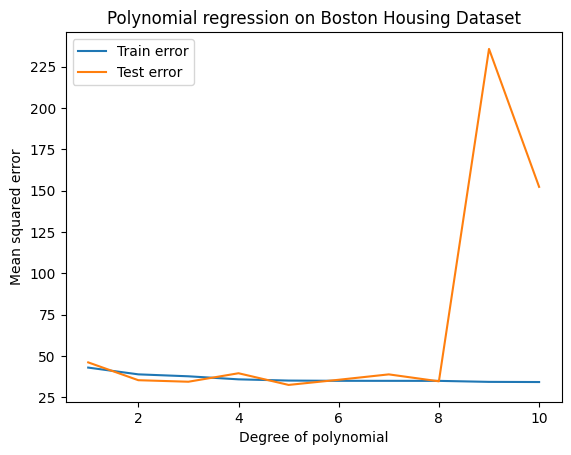

In [24]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of degrees
degrees = list(range(1, 11))

# Initialize empty lists for errors
train_errors = []
test_errors = []

# Loop over degrees
for degree in degrees:
    # Create polynomial feature transformer
    poly = PolynomialFeatures(degree)

    # Transform features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # Create and fit linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict response
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append errors to lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot errors against degrees
plt.plot(degrees, train_errors, label='Train error')
plt.plot(degrees, test_errors, label='Test error')
plt.title('Polynomial regression on Boston Housing Dataset')
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()
